## Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt    #importing imortant liberaries
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Importing Data
The data consists of chemical compositions, mechanical properties and treatment temperatures

In [2]:
Data=pd.read_csv("D:/Thesis/Data.csv")

In [3]:
Data.head()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Solution_treatment_temperature,Solution_treatment_time(s),Water_Quenched_after_s.t.,Air_Quenched_after_s.t.,Grains mm-2,Type of melting,Size of ingot,Product form,Temperature (K),0.2%proof_stress (M Pa),UTS (M Pa),Elongation (%),Area_reduction (%),Comments
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,1,0,477.7128917,1,3,1,298,280.0,610.0,67,83,NRIM/CDS/No4B/1986 ABA
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,1,0,477.7128917,1,3,1,373,243.0,508.0,54,83,NRIM/CDS/No4B/1986 ABA
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,1,0,477.7128917,1,3,1,473,220.0,472.0,44,81,NRIM/CDS/No4B/1986 ABA
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,1,0,477.7128917,1,3,1,573,204.0,470.0,43,76,NRIM/CDS/No4B/1986 ABA
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,1403,Na,1,0,477.7128917,1,3,1,673,197.0,470.0,45,76,NRIM/CDS/No4B/1986 ABA


In [4]:
Data.shape

(2180, 35)

# Data Preprocessing/EDA

In [5]:
Data.columns

Index(['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Ti', 'Zr', 'Ta', 'V', 'W', 'Cu',
       'N', 'C', 'B', 'P', 'S', 'Co', 'Al', 'Sn', 'Pb',
       'Solution_treatment_temperature', 'Solution_treatment_time(s)',
       'Water_Quenched_after_s.t.', 'Air_Quenched_after_s.t.', 'Grains mm-2',
       'Type of melting', 'Size of ingot', 'Product form', 'Temperature (K)',
       '0.2%proof_stress (M Pa)', 'UTS (M Pa)', 'Elongation (%)',
       'Area_reduction (%)', 'Comments'],
      dtype='object')

Removing Columns which are not required

In [6]:
Data.drop(['Solution_treatment_temperature', 'Solution_treatment_time(s)',
       'Water_Quenched_after_s.t.', 'Air_Quenched_after_s.t.','Type of melting', 'Size of ingot', 'Product form', 'Area_reduction (%)', 
           'Comments' ],axis=1,inplace=True)

In [7]:
Data.head(5)

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Grains mm-2,Temperature (K),0.2%proof_stress (M Pa),UTS (M Pa),Elongation (%)
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,477.7128917,298,280.0,610.0,67
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,477.7128917,373,243.0,508.0,54
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,477.7128917,473,220.0,472.0,44
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,477.7128917,573,204.0,470.0,43
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0,0,0.0,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,0,0,477.7128917,673,197.0,470.0,45


checking if there are any null values

In [8]:
Data.isnull().sum()

Cr                         0
Ni                         0
Mo                         0
Mn                         0
Si                         0
Nb                         0
Ti                         0
Zr                         0
Ta                         0
V                          0
W                          1
Cu                         0
N                          0
C                          0
B                          0
P                          0
S                          0
Co                         0
Al                         0
Sn                         0
Pb                         0
Grains mm-2                0
Temperature (K)            0
0.2%proof_stress (M Pa)    0
UTS (M Pa)                 0
Elongation (%)             0
dtype: int64

In [9]:
Data.columns

Index(['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Ti', 'Zr', 'Ta', 'V', 'W', 'Cu',
       'N', 'C', 'B', 'P', 'S', 'Co', 'Al', 'Sn', 'Pb', 'Grains mm-2',
       'Temperature (K)', '0.2%proof_stress (M Pa)', 'UTS (M Pa)',
       'Elongation (%)'],
      dtype='object')

In [10]:
Data.describe()

,Cr,Ni,Mo,Mn,Si,Nb,Ti,Zr,Ta,V,W,Cu,N,C,B,P,S,Co,Al,Sn,Pb,Temperature (K),0.2%proof_stress (M Pa),UTS (M Pa)
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.0,2180.0,2180.000000,2179.0,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.0,2180.0,2180.000000,2180.000000,2180.000000
mean,17.808335,12.580528,1.015940,1.463771,0.499528,0.095143,0.145684,0.0,0.0,0.002547,0.0,0.042482,0.006798,0.056881,0.000378,0.021331,0.012847,0.035182,0.031617,0.0,0.0,674.651376,158.521514,433.330996
std,0.991134,5.152322,1.164922,0.235216,0.140637,0.256143,0.202533,0.0,0.0,0.009969,0.0,0.081307,0.011949,0.014257,0.001039,0.007546,0.007328,0.099834,0.102131,0.0,0.0,233.025431,46.603133,93.726234
min,15.900000,8.400000,0.000000,0.610000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.012000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,293.000000,35.000000,47.000000
25%,17.110000,10.430000,0.000000,1.430000,0.400000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.050000,0.000000,0.019000,0.007000,0.000000,0.000000,0.0,0.0,473.000000,124.886114,393.811666
50%,17.700000,11.600000,0.110000,1.520000,0.490000,0.000000,0.014000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.055000,0.000000,0.023000,0.012000,0.000000,0.000000,0.0,0.0,673.000000,151.022410,439.000000
75%,18.200000,12.210000,2.370000,1.610000,0.590000,0.010000,0.390000,0.0,0.0,0.000000,0.0,0.060000,0.012000,0.065000,0.000300,0.025000,0.018000,0.000000,0.010000,0.0,0.0,873.000000,186.000000,484.000000
max,21.060000,34.450000,2.910000,1.820000,1.150000,0.950000,0.560000,0.0,0.0,0.057000,0.0,0.350000,0.081000,0.120000,0.015000,0.040000,0.050000,0.540000,0.520000,0.0,0.0,1273.000000,341.271420,713.924120


#### Remove the columns with zeros

In [11]:
Data.drop(['Zr','Ta','W','Sn','Pb'],axis=1,inplace=True)

<AxesSubplot:>

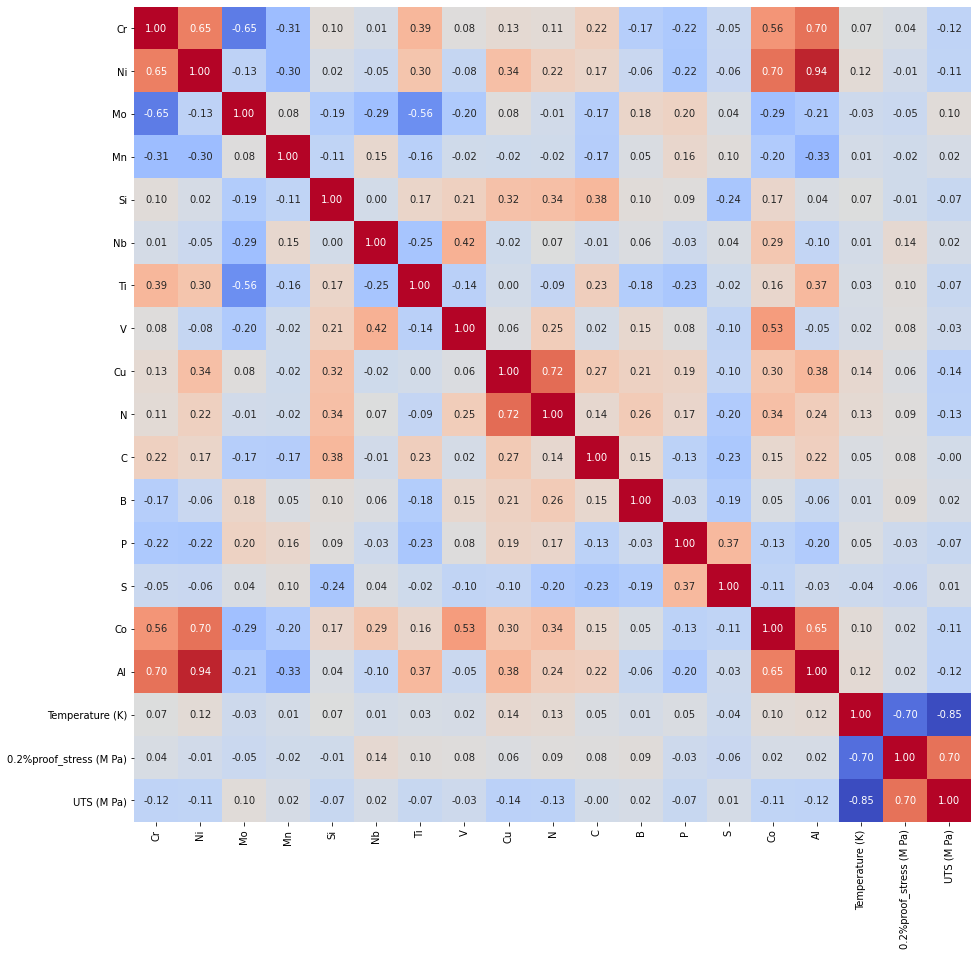

In [12]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

In [13]:
Data.rename(columns={'Temperature (K)':'Temperature','Elongation (%)':'Elongation','Grains mm-2':'Grain'},inplace=True)

In [14]:
Data['Elongation'] = Data['Elongation'].str.replace('([A-Za-z]+)', '')
Data['Elongation_Letter'] = Data['Elongation'].str.extract('([A-Za-z]+)')

In [15]:
Data.drop(['Elongation_Letter'],axis=1)

,Cr,Ni,Mo,Mn,Si,Nb,Ti,V,Cu,N,C,B,P,S,Co,Al,Grain,Temperature,0.2%proof_stress (M Pa),UTS (M Pa),Elongation
0,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,477.7128917,298,280.000000,610.000000,67
1,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,477.7128917,373,243.000000,508.000000,54
2,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,477.7128917,473,220.000000,472.000000,44
3,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,477.7128917,573,204.000000,470.000000,43
4,18.7,10.69,0.47,1.56,0.62,0.01,0.04,0.0,0.17,0.031,0.062,0.0007,0.025,0.013,0.0,0.047,477.7128917,673,197.000000,470.000000,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0.0,0.00,0.000,0.050,0.0000,0.019,0.018,0.0,0.000,Na,723,171.616375,454.047895,34.9
2176,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0.0,0.00,0.000,0.050,0.0000,0.019,0.018,0.0,0.000,Na,773,166.713050,435.415260,33
2177,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0.0,0.00,0.000,0.050,0.0000,0.019,0.018,0.0,0.000,Na,823,169.655045,424.627945,34.2
2178,17.7,12.28,0.00,1.24,0.30,0.83,0.00,0.0,0.00,0.000,0.050,0.0000,0.019,0.018,0.0,0.000,Na,873,168.674380,398.149990,37.6


In [16]:
Data.replace({ "": np.nan},inplace=True)
Data.isnull().sum()

Cr                            0
Ni                            0
Mo                            0
Mn                            0
Si                            0
Nb                            0
Ti                            0
V                             0
Cu                            0
N                             0
C                             0
B                             0
P                             0
S                             0
Co                            0
Al                            0
Grain                         0
Temperature                   0
0.2%proof_stress (M Pa)       0
UTS (M Pa)                    0
Elongation                   95
Elongation_Letter          2180
dtype: int64

In [17]:
mel_count=Data['Elongation'].str.contains('Na').sum()
if mel_count>0:
    print (" {m} ".format(m=mel_count))
else:
    print('0')

0


In [18]:
Data.dropna(axis=0,inplace=True)
Data.isnull().sum()

Cr                         0.0
Ni                         0.0
Mo                         0.0
Mn                         0.0
Si                         0.0
Nb                         0.0
Ti                         0.0
V                          0.0
Cu                         0.0
N                          0.0
C                          0.0
B                          0.0
P                          0.0
S                          0.0
Co                         0.0
Al                         0.0
Grain                      0.0
Temperature                0.0
0.2%proof_stress (M Pa)    0.0
UTS (M Pa)                 0.0
Elongation                 0.0
Elongation_Letter          0.0
dtype: float64

In [19]:
df=Data

In [20]:
Data.replace(r'-', np.NaN,inplace=True)
df.replace(r'',np.NaN,inplace=True)
df.replace(r'*',np.NaN,inplace=True)
df.replace(r'&',np.NaN,inplace=True)
df.replace(r'^',np.NaN,inplace=True)
df.replace(r'%',np.NaN,inplace=True)
df.replace(r'$',np.NaN,inplace=True)
df.replace(r'#',np.NaN,inplace=True)
df.replace(r'@',np.NaN,inplace=True)
df.replace(r'!',np.NaN,inplace=True)
df.replace(r'<',np.NaN,inplace=True)
df.replace(r'>',np.NaN,inplace=True)
df.replace(r'?',np.NaN,inplace=True)
df.replace(r'\s+', np.nan, regex=True,inplace=True)

In [21]:
df['Cr'] = pd.to_numeric(df['Cr'], downcast="float")
df['Ni'] = pd.to_numeric(df['Ni'], downcast="float")
df['Mo'] = pd.to_numeric(df['Mo'], downcast="float")
df['Mn'] = pd.to_numeric(df['Mn'], downcast="float")
df['P'] = pd.to_numeric(df['P'], downcast="float")
df['Si'] = pd.to_numeric(df['Si'], downcast="float")
df['Ni'] = pd.to_numeric(df['Ni'], downcast="float")

df['Cu'] = pd.to_numeric(df['Cu'], downcast="float")
df['C'] = pd.to_numeric(df['C'], downcast="float")
df['N'] = pd.to_numeric(df['N'], downcast="float")
df['S'] = pd.to_numeric(df['S'], downcast="float")
df['Temperature'] = pd.to_numeric(df['Temperature'], downcast="float")
df['0.2%proof_stress (M Pa)'] = pd.to_numeric(df['0.2%proof_stress (M Pa)'], downcast="float")
df['UTS (M Pa)'] = pd.to_numeric(df['UTS (M Pa)'], downcast="float")
df['Elongation'] = pd.to_numeric(df['Elongation'], downcast="float")


In [28]:
df

,Cr,Ni,Mo,Mn,Si,Nb,Ti,V,Cu,N,C,B,P,S,Co,Al,Grain,Temperature,0.2%proof_stress (M Pa),UTS (M Pa),Elongation,Elongation_Letter


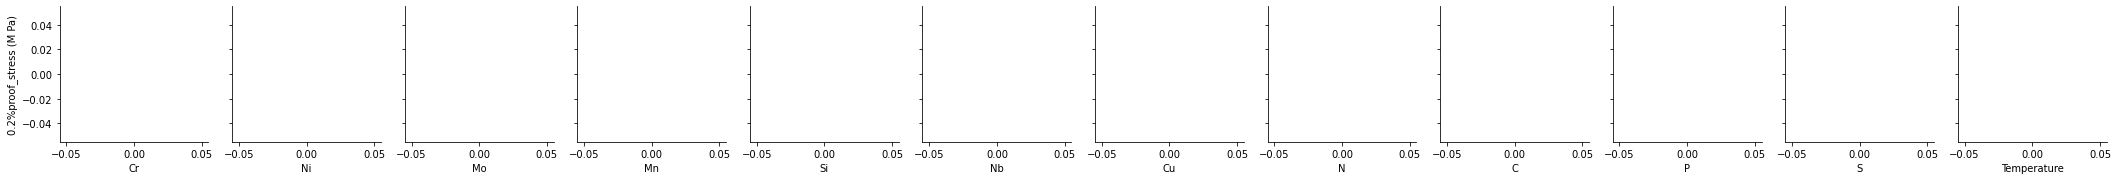

In [22]:
sns.pairplot(data=Data,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Cu', 'N', 'C', 'P',
       'S','Temperature'],    
             y_vars=['0.2%proof_stress (M Pa)']
                  )

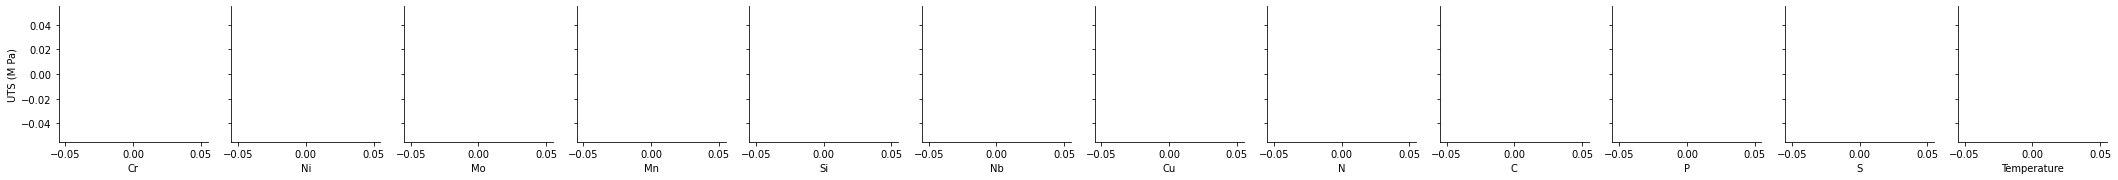

In [23]:
sns.pairplot(data=Data,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Cu', 'N', 'C', 'P',
       'S','Temperature'],    
             y_vars=['UTS (M Pa)']
                  )

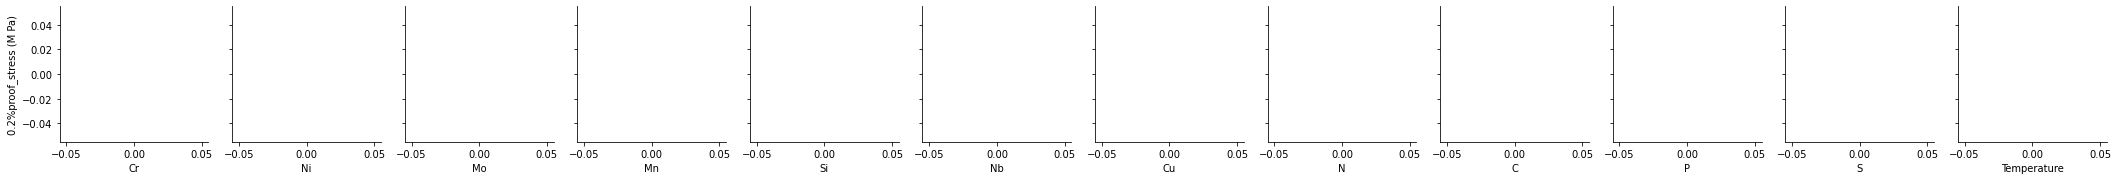

In [24]:
sns.pairplot(data=Data,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr', 'Ni', 'Mo', 'Mn', 'Si', 'Nb', 'Cu', 'N', 'C', 'P',
       'S','Temperature'],    
             y_vars=['0.2%proof_stress (M Pa)']
                  )

# Handling Outliers

In [25]:
import seaborn as sns
from scipy.stats.mstats import winsorize

In [26]:

sns.boxplot(winsorize(Data["UTS (M Pa)"],limits =[0.05,0.0765]))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
df["UTS (M Pa)"] = winsorize(Data["UTS (M Pa)"],limits =[0.05,0.0765])

In [ ]:
sns.boxplot(winsorize(Data['0.2%proof_stress (M Pa)'],limits =[0.02,0.0765]))

In [ ]:
df["0.2%proof_stress (M Pa)"] = winsorize(Data['0.2%proof_stress (M Pa)'],limits =[0.02,0.0765])

In [ ]:
sns.boxplot(winsorize(Data['Cr'],limits =[0.02,0.0765]))

In [ ]:
df['Cr']=(winsorize(Data['Cr'],limits =[0.02,0.0765]))

In [ ]:
df.boxplot()

In [ ]:
sns.boxplot(winsorize(Data['Ni'],limits =[0.02,0.0765]))

In [ ]:
df['Ni']=winsorize(Data['Ni'],limits =[0.02,0.0765])

In [ ]:
sns.boxplot(winsorize(Data['Mn'],limits =[0.12,0.0765]))

In [ ]:
df['Mn']=winsorize(Data['Mn'],limits =[0.12,0.0765])

In [ ]:
sns.boxplot(Data['Si'])

In [ ]:
sns.boxplot(winsorize(Data['Si'],limits =[0.01,0.0865]))

In [ ]:
df['Si']=winsorize(Data['Si'],limits =[0.01,0.0865])

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
sns.boxplot(winsorize(Data['Nb'],limits =[0.0,0.2]))

In [ ]:
df['Nb']=winsorize(Data['Nb'],limits =[0.0,0.2])

In [ ]:
sns.boxplot(winsorize(Data['V'],limits =[0.0,0.065]))

In [ ]:
sns.boxplot(winsorize(Data['Cu'],limits =[0.0,0.12]))

In [ ]:
df['Cu']=winsorize(Data['Cu'],limits =[0.0,0.12])

In [ ]:
sns.boxplot(winsorize(Data['N'],limits =[0.0,0.12]))

In [ ]:
df['N']=winsorize(Data['N'],limits =[0.0,0.12])

In [ ]:
sns.boxplot(winsorize(Data['C'],limits =[0.05,0.12]))

In [ ]:
df['C']=winsorize(Data['C'],limits =[0.05,0.12])

In [ ]:
sns.boxplot(winsorize(Data['P'],limits =[0.1,0.12]))

In [ ]:
df['P']=winsorize(Data['P'],limits =[0.1,0.12])

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
sns.boxplot(winsorize(Data['S'],limits =[0.0,0.12]))

In [ ]:
df['S']=winsorize(Data['S'],limits =[0.0,0.12])

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
df.columns

Dropping Less important columns

In [ ]:
# df.drop(['Nb', 'Ti', 'Zr', 'Ta', 'V', 'W','B','Co', 'Al', 'Sn', 'Pb'],axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
df.head(0)

We encountered one string 'Na'. So checking if it has been removed

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['Elongation_Letter'],axis=1,inplace=True)

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
df.shape

In [ ]:
df.shape

In [ ]:
#df[~df.Temperature.str.contains("Na")]
df[~df.Grain.str.contains("Na")]

In [ ]:
df.replace({'':np.nan},inplace=True)

In [ ]:
df.drop(['Grain'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

We could not treat outliers of Elongation columns before. 
So, we are looking if the strings in this columns have been treated successfully

In [ ]:
sns.boxplot(Data['Elongation'])

In [ ]:
sns.boxplot(winsorize(Data['Elongation'],limits =[0.03,0.12]))

In [ ]:
df['Elongation']=winsorize(Data['Elongation'],limits =[0.03,0.12])

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
sns.boxplot(df['Mn'])

In [ ]:
sns.boxplot(winsorize(Data['Mn'],limits=(0.17,0.05)))

In [ ]:
df['Mn']=winsorize(Data['Mn'],limits=(0.17,0.05))

In [ ]:
df.boxplot(figsize=(15,6))

In [ ]:
plt.rcParams['figure.figsize']=(15,6)

In [ ]:
df.columns

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

In [ ]:
df.columns

# Data Splitting and modelling

#### Al and Co are removed to avoid multicolinearty

In [ ]:
X=df.drop(['0.2%proof_stress (M Pa)', 'UTS (M Pa)', 'Elongation','Al','Co'],axis=1) #Al is removed to avoid multicolinearty
y=df[['0.2%proof_stress (M Pa)', 'UTS (M Pa)',
       'Elongation']]

#### Let's check which model will be more suitable for the dataset
Since the problem is to predict three outputs( YS, TS and Elongation). We can use the following algorithms
* Extra trees
*  K-nn
*  Linear regression
*  Ridge
*  Lasso
*  ElasticNet
*  RandomForestRegressor
*  Decision Tree Regressor
*  MultiO/P GradientBoostingRegressor
*  MultiO/P AdaBoostRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Prepare a dictionary of estimators after instantiating each one of them
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=2),
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(random_state=2)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(random_state=2)),
    "multioutputregressor":MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',random_state=2))
    
}

In [ ]:
# Create an empty dictionary to collect prediction values
y_test_predict = dict()
y_mse = dict()
score=dict()
score_train=dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    y_mse[name] = mean_squared_error(y_test, estimator.predict(X_test))
    score[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)
    

In [ ]:
score

### From the result above, it looks like XGBOOST algorithms perform bettr. So we are choosing xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',learning_rate=0.21,random_state=42))
model.fit(X_train, y_train)


# Model Evaluation

In [ ]:
r2=model.score(X_test,y_test)
print('R2: {:.4f}'.format(r2))

In [ ]:
print('training r2_score')
model.score(X_train,y_train)

In [ ]:

from sklearn.metrics import mean_squared_error as MSE
y_pred=model.predict(X_test)
rmse_test = np.sqrt(MSE(y_test, y_pred))
print("RMSE: ", np.round(rmse_test, 2))

### Mean Squared Errors for individual outputs

In [ ]:
print(np.mean((y_test-model.predict(X_test))**2, axis=0))

### Root Mean Squared Errors for individual outputs

In [ ]:
print(np.sqrt(np.mean((y_test-model.predict(X_test))**2)))


# Visualizing model

In [ ]:
x_ax = range(len(X_test))
f, ax = plt.subplots(1, 1, figsize = (15, 6))
plt.plot(x_ax, y_test.iloc[:,0],  label="YS (MPa)")
plt.plot(x_ax, y_pred[:,0], label="YS-pred")
plt.plot(x_ax, y_test.iloc[:,1],label="UTS (MPa)")
plt.plot(x_ax, y_pred[:,1], label="UTS-pred")
plt.scatter(x_ax, y_test.iloc[:,2],  s=6, label="El% on 50mm GL ")
plt.plot(x_ax, y_pred[:,2], label="%Elongation-pred")
plt.legend()
plt.show()


## Checking feature importances of the model

In [ ]:
len(model.estimators_)

In [ ]:
X.columns

In [ ]:
model.estimators_[0].feature_importances_

In [ ]:
plt.barh(X.columns,model.estimators_[0].feature_importances_)
plt.title('YS',fontsize=15)

In [ ]:
model.estimators_[1].feature_importances_

In [ ]:
plt.barh(X.columns,model.estimators_[1].feature_importances_,color='red')
plt.title('UTS',fontsize=15)

In [ ]:
model.estimators_[2].feature_importances_

In [ ]:
plt.barh(X.columns,model.estimators_[2].feature_importances_,color='green')
plt.title("Elongation",fontsize=15)

In [ ]:
model.estimators_[2].feature_importances_

In [ ]:
# Removing non-contributing features

# Hyperparameter tuning and Cross Validation 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [x for x in range(100,120,2)]
learning_rate=[ x for x in np.arange(0.1,0.3,0.02)]
# Maximum number of levels in tree
max_depth = [x for x in range(2,12,1)]
max_depth.append(None)
# Create the random grid
param_grid = {'estimator__learning_rate':[x for x in np.arange(0.1,0.3,0.1)],
              'estimator__n_estimators':[x for x in range(100,1000,10)],
               'estimator__max_depth':[x for x in range(4,15,1)],
             }
            

In [ ]:
 #Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rm = RandomizedSearchCV(rf, param_distributions =param_grid , 
                  n_jobs=2, cv=5,random_state=42, return_train_score=True)
tuned=rm.fit(X_train, y_train)

In [ ]:
tuned.best_params_

In [ ]:
tuned.score(X_test,y_test)

In [ ]:
tuned_model = tuned.best_estimator_

In [ ]:
tuned_model.score(X_test,y_test)

In [ ]:
tuned.score(X_train,y_train)